## ライブラリのインストール

In [ ]:
!pip install ucimlrepo

## ライブラリのインポート

In [ ]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neural_network import MLPClassifier

random_state=1234

## データセット

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print("metadata:")
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print("variable information:")
print(predict_students_dropout_and_academic_success.variables)


metadata:
{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 

In [ ]:
X.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


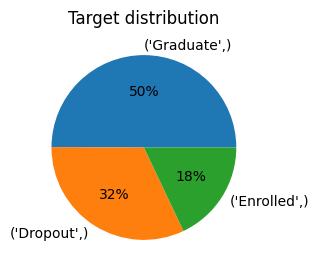

In [ ]:
tmp = y.value_counts()
plt.figure(figsize=(6, 3))
plt.pie(tmp, labels=tmp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

In [ ]:
X.nunique()

Marital Status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  4424 non-null   object
dtypes: object(1)
memory usage: 34.7+ KB


In [ ]:
for column in X.columns:
    # クロス集計表の作成
    crosstab = pd.crosstab(X[column], y['Target'])

    # 正規化して割合にする
    crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

    # ヒートマップの描画
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab_normalized, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'Heatmap of {column} vs Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# numpyに変換
X = X.to_numpy()
y = y.to_numpy()

## lightGBMで学習

In [ ]:
# クロスバリデーションの分割数
n_split = 5

total_score = 0
split_num = 1

# クロスバリデーション
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=random_state).split(X, y):
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  clf = GBC(min_samples_leaf=10, random_state=random_state)
  clf = clf.fit(X_train, y_train)

  # 学習データにおけるaccuracy
  train_score = clf.score(X_train, y_train)
  print("train_data" + str(split_num) + ": score=" + str(train_score))

  # テストデータにおけるaccuracy
  test_score = clf.score(X_test, y_test)
  print("test_data" + str(split_num) + ": score=" + str(test_score))

  total_score += test_score
  split_num += 1

# test_scoreの平均値をscoreとする
final_score = total_score / n_split
print("Cross Validation Accuracy = " + str(final_score))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data1: score=0.8335688047471037
test_data1: score=0.7785310734463277


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data2: score=0.8397852500706414
test_data2: score=0.7807909604519774


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data3: score=0.8400678157671658
test_data3: score=0.7604519774011299


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data4: score=0.8363944617123481
test_data4: score=0.7819209039548023


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data5: score=0.8437853107344633
test_data5: score=0.7647058823529411
Cross Validation Accuracy = 0.7732801595214356


## DNN(MLP)で学習

In [ ]:
# クロスバリデーションの分割数
n_split = 5

total_score = 0
split_num = 1

# クロスバリデーション
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=random_state).split(X, y):
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  clf = MLPClassifier(hidden_layer_sizes=(20, 10), random_state=random_state)
  clf = clf.fit(X_train, y_train)

  # 学習データにおけるaccuracy
  train_score = clf.score(X_train, y_train)
  print("train_data" + str(split_num) + ": score=" + str(train_score))

  # テストデータにおけるaccuracy
  test_score = clf.score(X_test, y_test)
  print("test_data" + str(split_num) + ": score=" + str(test_score))

  total_score += test_score
  split_num += 1

# test_scoreの平均値をscoreとする
final_score = total_score / n_split
print("Cross Validation Accuracy = " + str(final_score))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data1: score=0.6287086747668833
test_data1: score=0.6180790960451977


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data2: score=0.6973721390223226
test_data2: score=0.6677966101694915


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data3: score=0.7208250918338514
test_data3: score=0.7197740112994351


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data4: score=0.664311952528963
test_data4: score=0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_data5: score=0.6912429378531073
test_data5: score=0.6957013574660633
Cross Validation Accuracy = 0.6736035483293709
